# Introduction
In this analysis, I hypothesize that factors such as income, unemployment status, health conditions, and genetics significantly impact depression. To explore this, i categorized fifteen features into various groups, including social, economic, and health-related factors, to assess their influence on depression. By conducting an exploratory analysis, I identified which categories have the most substantial impact on depression. Furthermore, I applied causal inference using propensity score matching to estimate the ATE, and also using the LiNGAM model to validate these findings. This comprehensive approach aims to uncover the underlying causal relationships and provide insights into the key determinants of depression, facilitating targeted interventions and prevention strategies.# Import Libraries

# Importing

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data_1=pd.read_csv('depression_data.csv')

# Data Preprocessing

In [3]:
data = data_1.sample(frac=0.3, random_state=42)

In [4]:
columns_needed = ['Marital Status', 'Number of Children', 'Smoking Status', 
                  'Physical Activity Level', 'Employment Status', 'Alcohol Consumption', 
                  'Dietary Habits', 'Sleep Patterns', 'Education Level', 'Income', 
                  'History of Mental Illness', 'History of Substance Abuse', 
                  'Family History of Depression', 'Chronic Medical Conditions']
reduced_data = data[columns_needed]

In [5]:
data_optimized = reduced_data.copy()

for col in data_optimized.select_dtypes(include=['float64', 'int64']).columns:
    data_optimized[col] = pd.to_numeric(data_optimized[col], downcast='float')

for col in data_optimized.select_dtypes(include=['object']).columns:
    data_optimized[col] = data_optimized[col].astype('category')

# Data Visualization - Depression Ratios by Each Feature

## 1) Social Factors

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_2099/199398671.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_df = data_optimized.groupby(feature)['Chronic Medical Conditions'].value_counts(normalize=True).unstack().fillna(0)


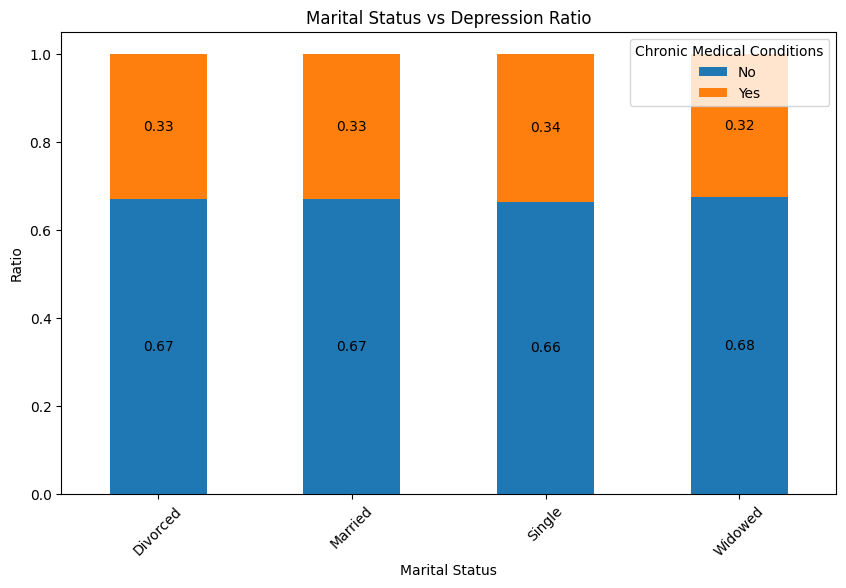

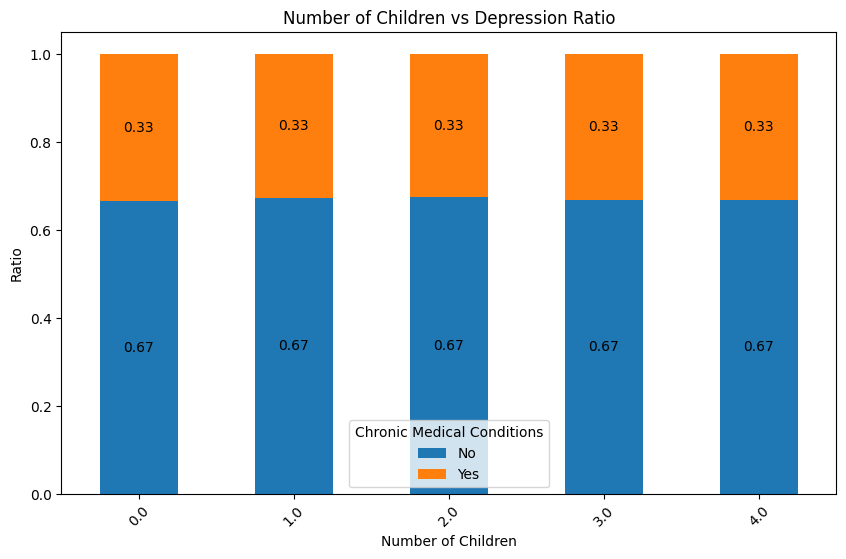

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_2099/199398671.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_df = data_optimized.groupby(feature)['Chronic Medical Conditions'].value_counts(normalize=True).unstack().fillna(0)


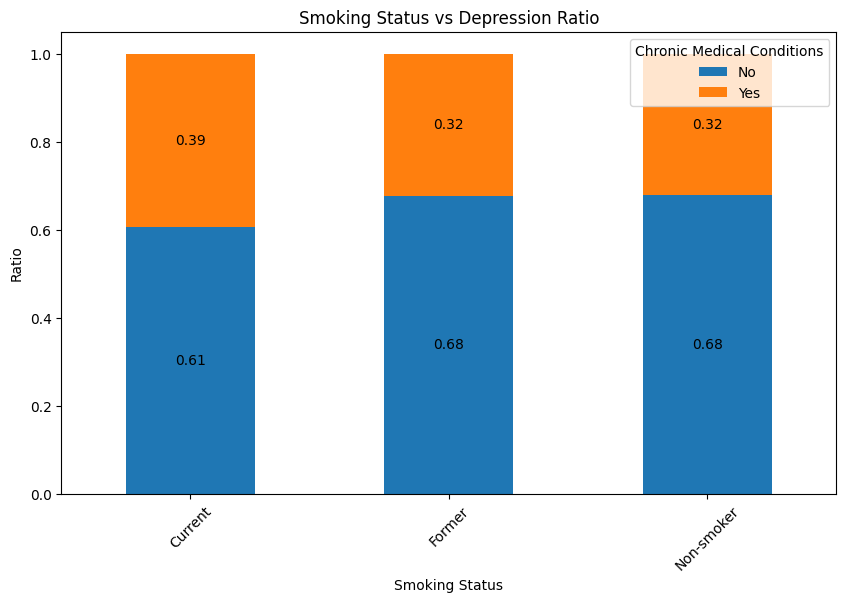

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_2099/199398671.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_df = data_optimized.groupby(feature)['Chronic Medical Conditions'].value_counts(normalize=True).unstack().fillna(0)


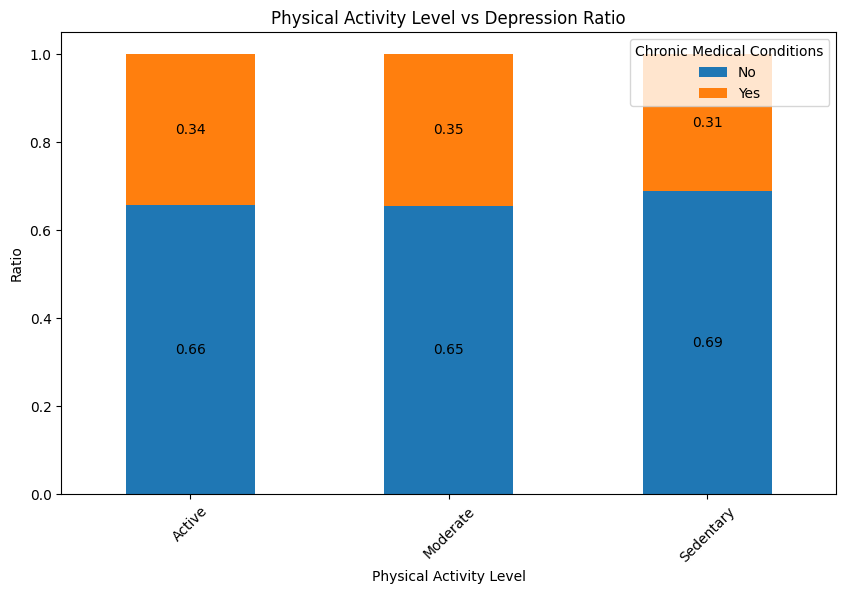

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_2099/199398671.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_df = data_optimized.groupby(feature)['Chronic Medical Conditions'].value_counts(normalize=True).unstack().fillna(0)


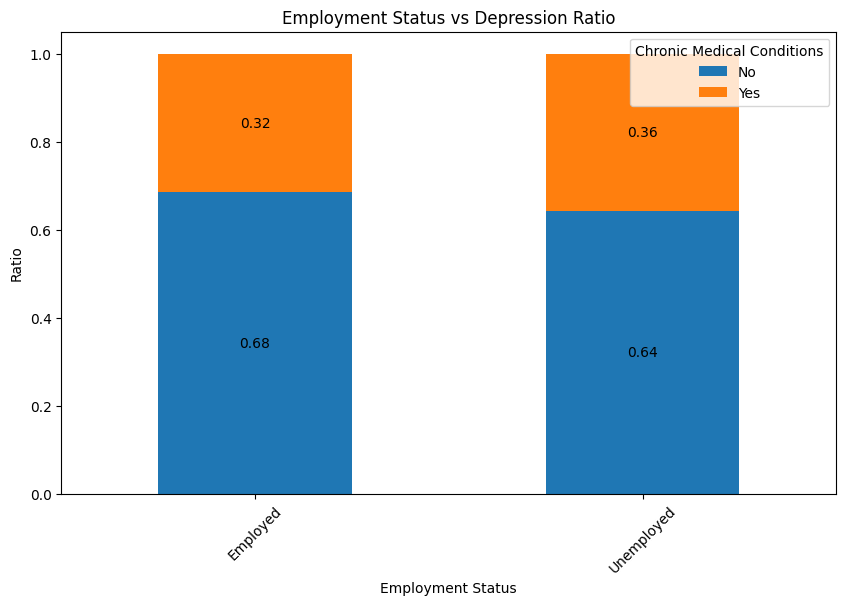

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_2099/199398671.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_df = data_optimized.groupby(feature)['Chronic Medical Conditions'].value_counts(normalize=True).unstack().fillna(0)


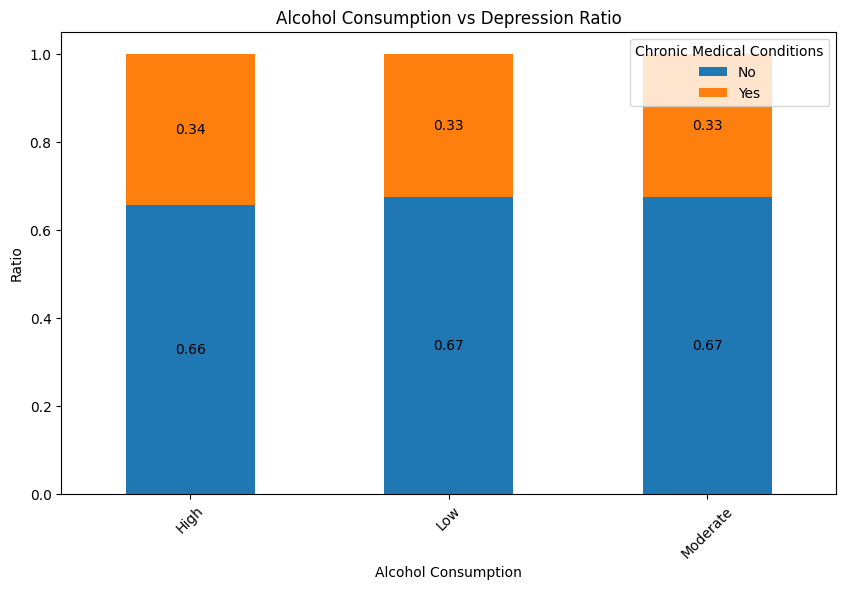

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_2099/199398671.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_df = data_optimized.groupby(feature)['Chronic Medical Conditions'].value_counts(normalize=True).unstack().fillna(0)


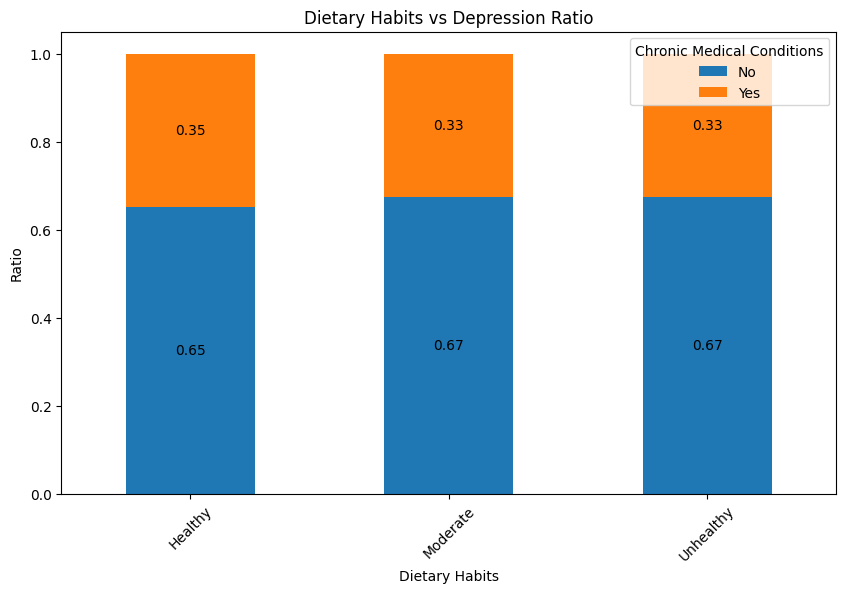

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_2099/199398671.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_df = data_optimized.groupby(feature)['Chronic Medical Conditions'].value_counts(normalize=True).unstack().fillna(0)


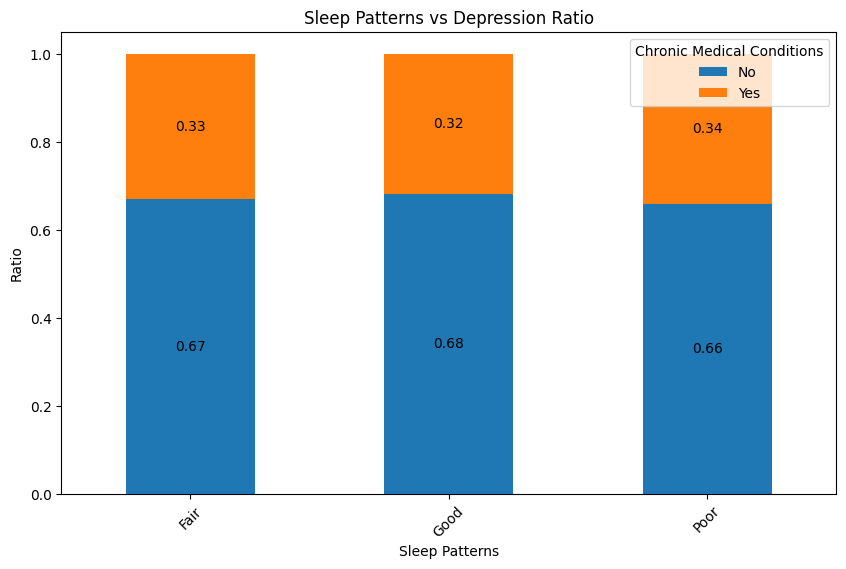

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_depression_ratio(feature, data_optimized):
    ratio_df = data_optimized.groupby(feature)['Chronic Medical Conditions'].value_counts(normalize=True).unstack().fillna(0)
    ax = ratio_df.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'{feature} vs Depression Ratio')
    plt.xlabel(feature)
    plt.ylabel('Ratio')
    plt.xticks(rotation=45)
    plt.legend(title='Chronic Medical Conditions', labels=['No', 'Yes'])

    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.2f}', (x + width/2, y + height/2), ha='center', va='center')

    plt.show()
    
# Social Factors vs. Chronic Medical Conditions
social_factors = ['Marital Status', 'Number of Children', 'Smoking Status', 
                  'Physical Activity Level', 'Employment Status', 'Alcohol Consumption', 
                  'Dietary Habits', 'Sleep Patterns']

for factor in social_factors:
    plot_depression_ratio(factor, data_optimized)

## 2) Economic Factors

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_2099/199398671.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_df = data_optimized.groupby(feature)['Chronic Medical Conditions'].value_counts(normalize=True).unstack().fillna(0)


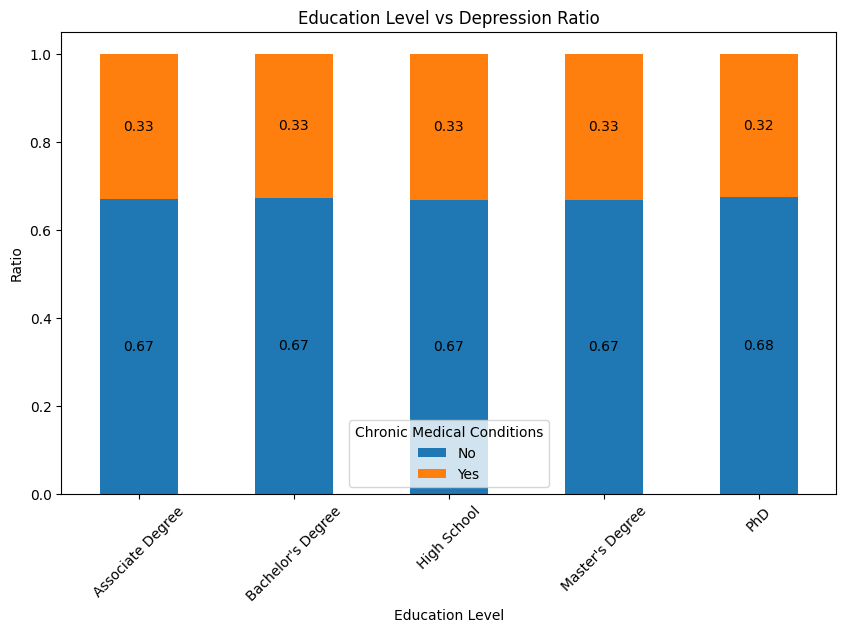

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_2099/199398671.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_df = data_optimized.groupby(feature)['Chronic Medical Conditions'].value_counts(normalize=True).unstack().fillna(0)


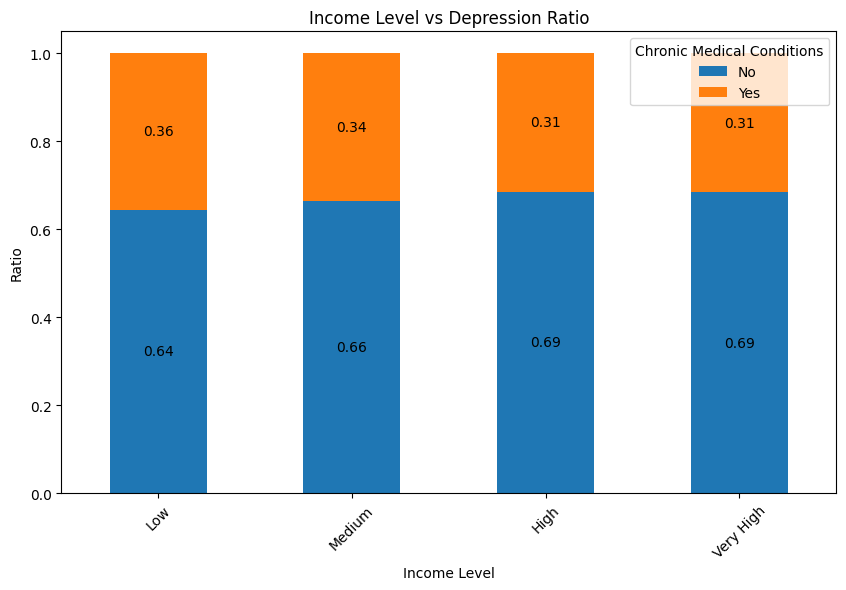

In [9]:
# Economic Factors vs. Chronic Medical Conditions
economic_factors = ['Education Level', 'Income']

for factor in economic_factors:
    if factor == 'Income':
        data_optimized['Income Level'] = pd.qcut(data_optimized['Income'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
        plot_depression_ratio('Income Level', data_optimized)
    else:
        plot_depression_ratio(factor, data_optimized)

## 3) Health Related Factors

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_2099/199398671.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_df = data_optimized.groupby(feature)['Chronic Medical Conditions'].value_counts(normalize=True).unstack().fillna(0)


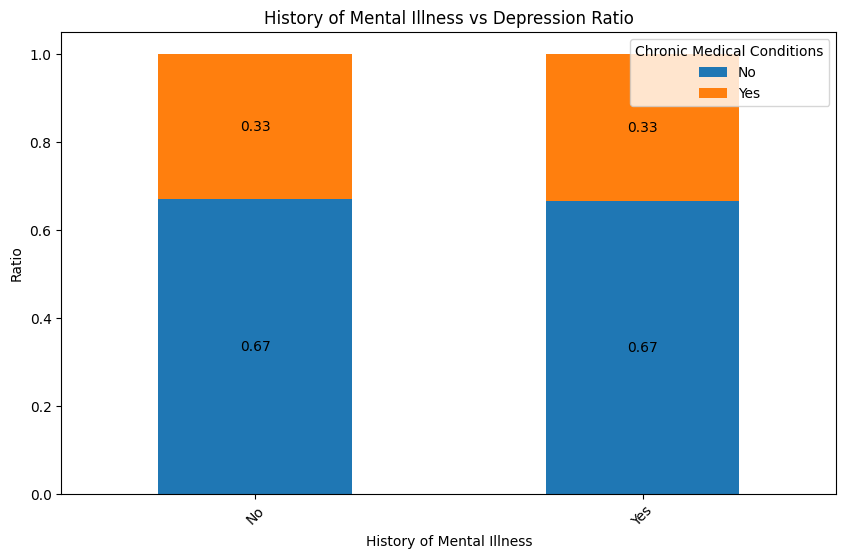

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_2099/199398671.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_df = data_optimized.groupby(feature)['Chronic Medical Conditions'].value_counts(normalize=True).unstack().fillna(0)


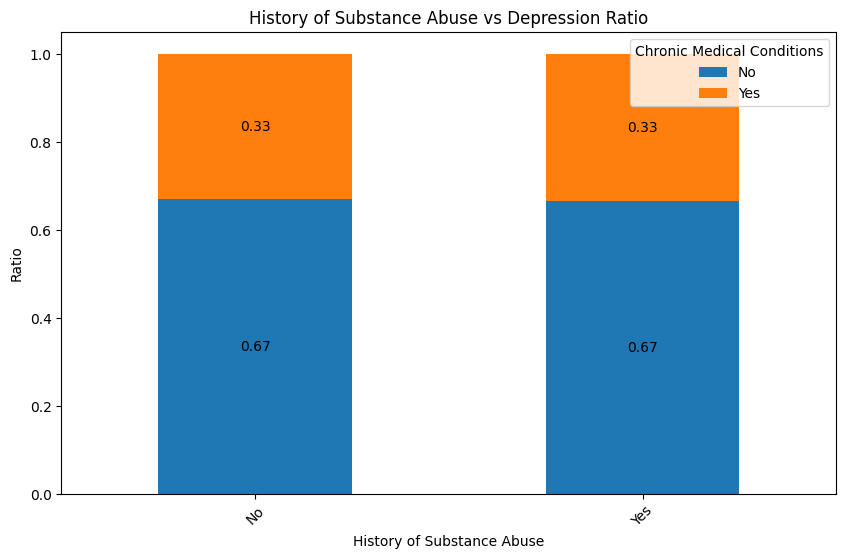

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_2099/199398671.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_df = data_optimized.groupby(feature)['Chronic Medical Conditions'].value_counts(normalize=True).unstack().fillna(0)


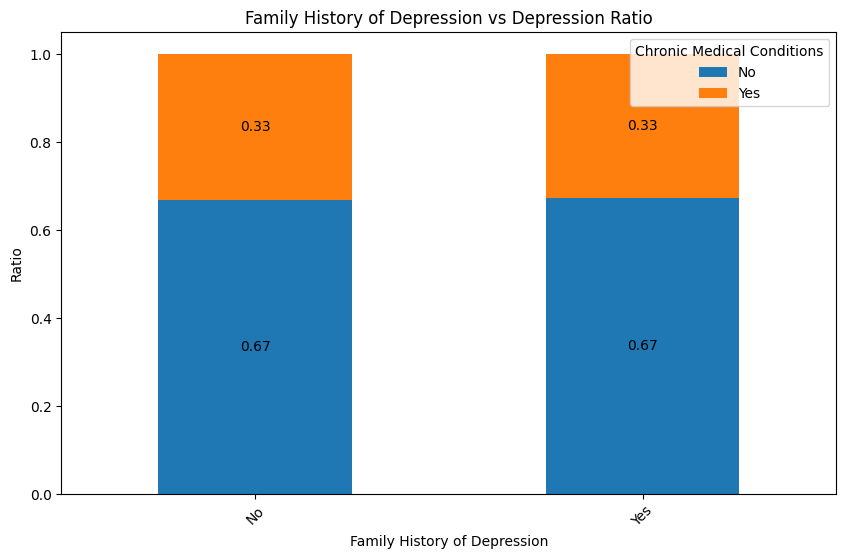

In [10]:
# Health-Related Factors vs. Chronic Medical Conditions
health_factors = ['History of Mental Illness', 'History of Substance Abuse', 
                  'Family History of Depression']

for factor in health_factors:
    plot_depression_ratio(factor, data_optimized)

# Data Visualization - Countplot by Each Feature

## 1) Social Factors

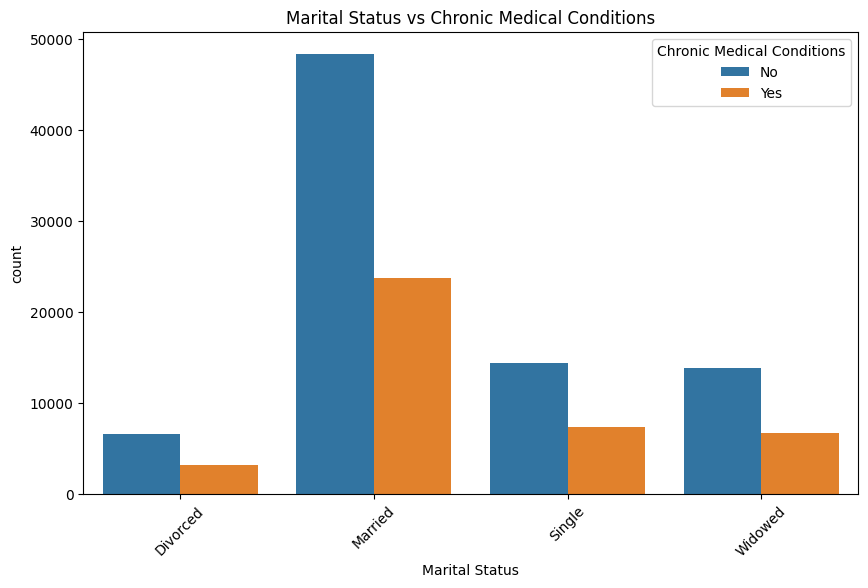

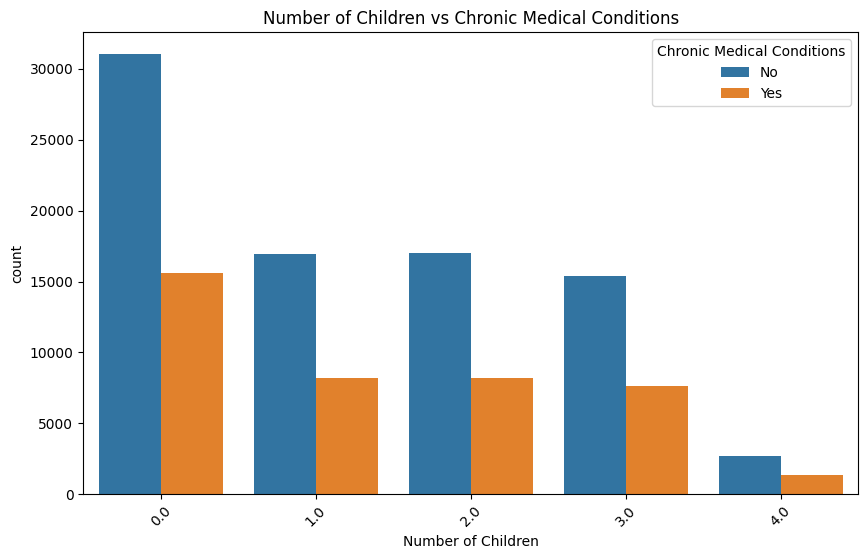

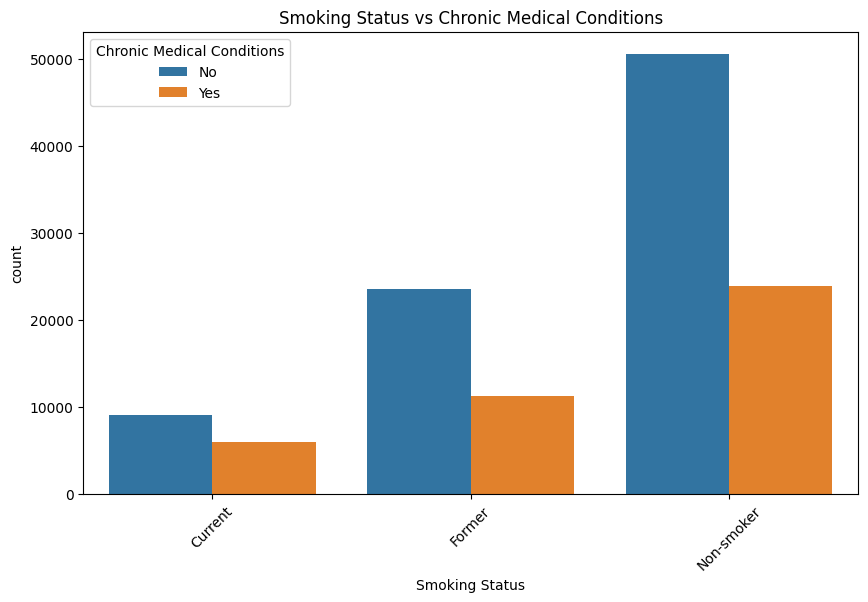

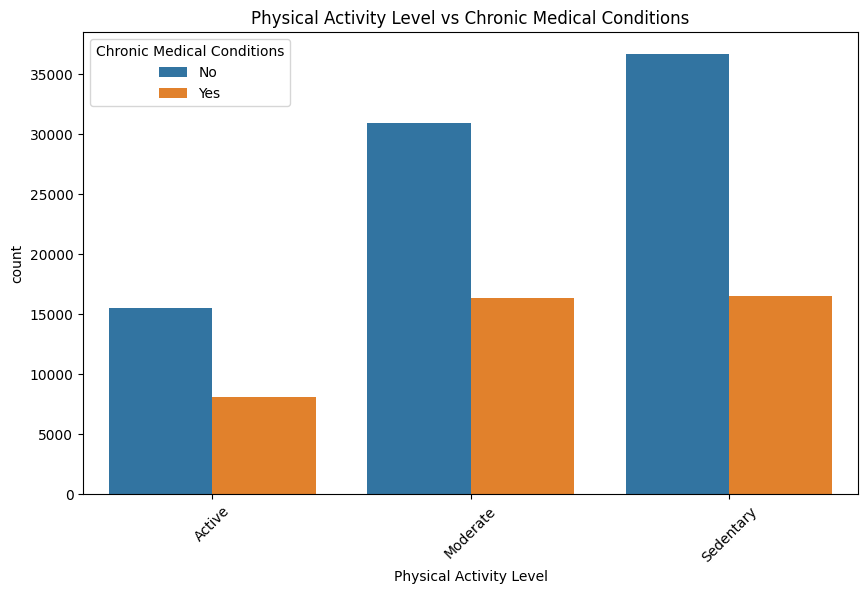

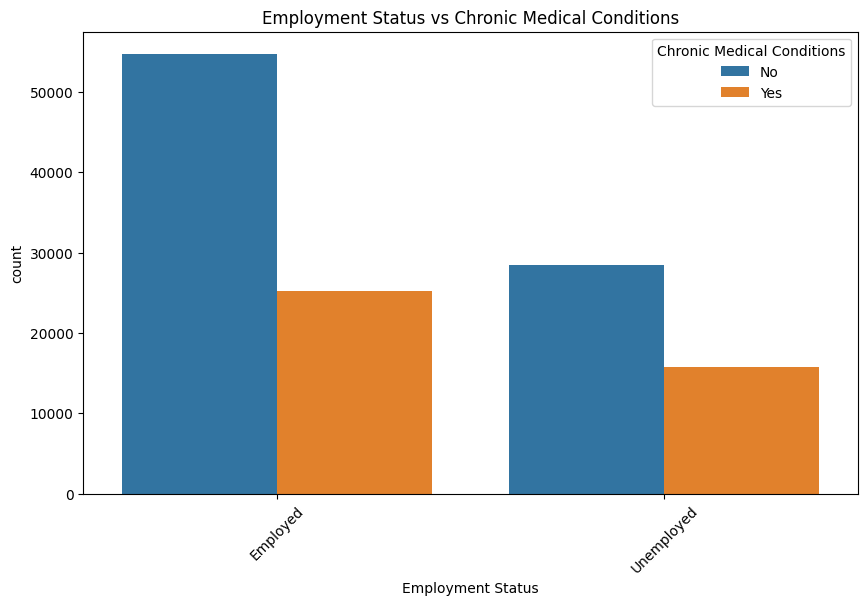

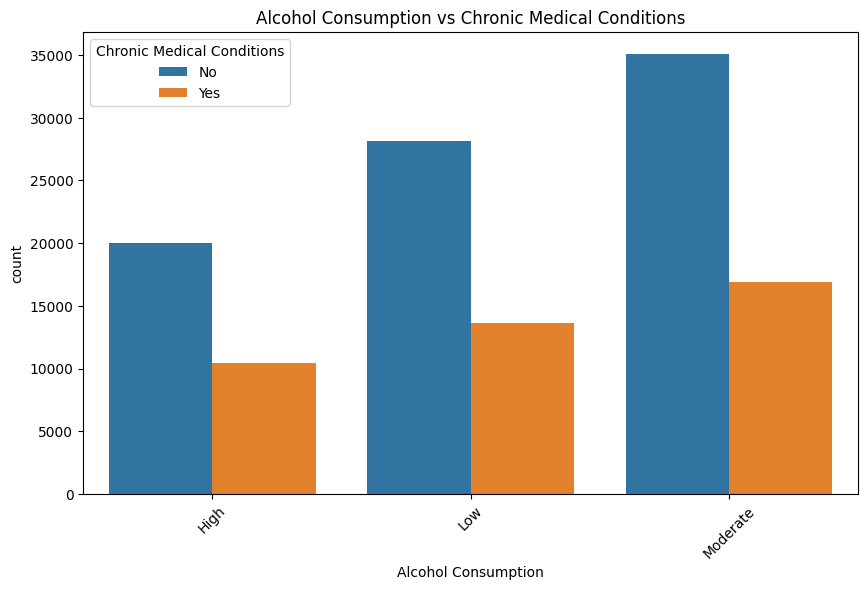

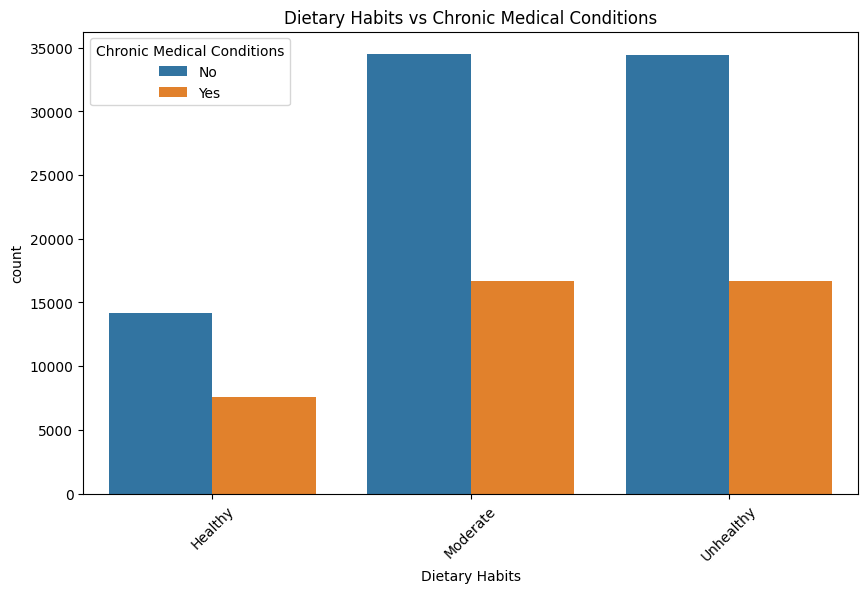

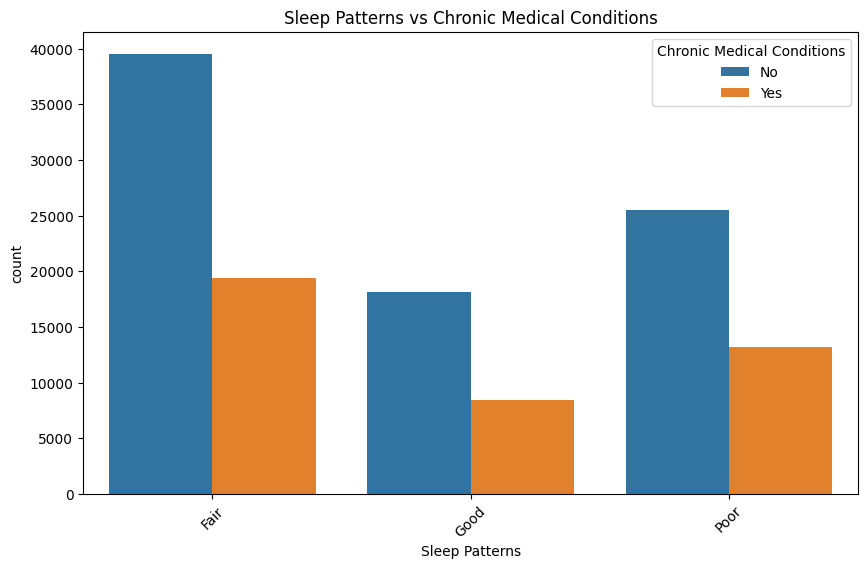

In [12]:
# Social Factors vs. Chronic Medical Conditions
social_factors = ['Marital Status', 'Number of Children', 'Smoking Status', 
                  'Physical Activity Level', 'Employment Status', 'Alcohol Consumption', 
                  'Dietary Habits', 'Sleep Patterns']

for factor in social_factors:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=factor, hue='Chronic Medical Conditions', data=data_optimized)
    plt.title(f'{factor} vs Chronic Medical Conditions')
    plt.xticks(rotation=45)
    plt.show()

## 2) Economic Factors

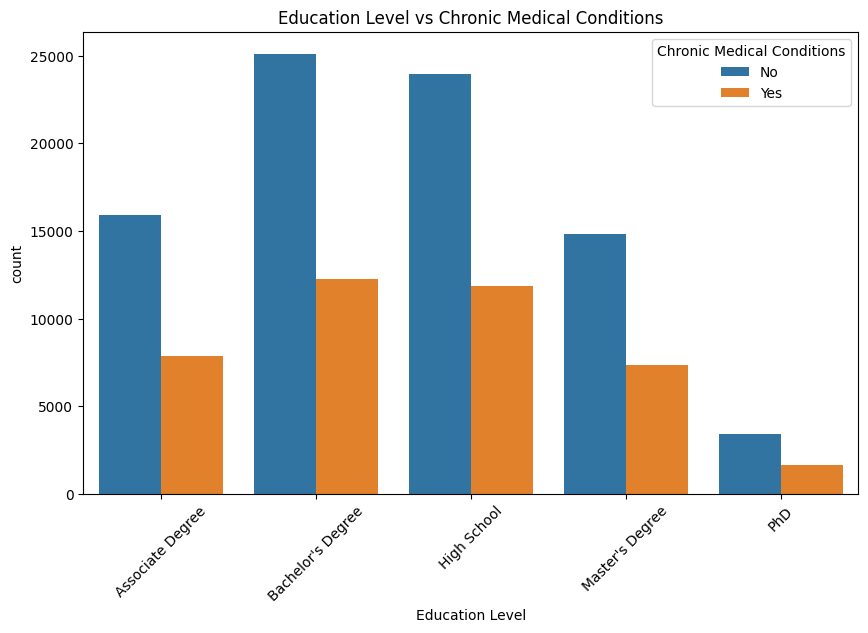

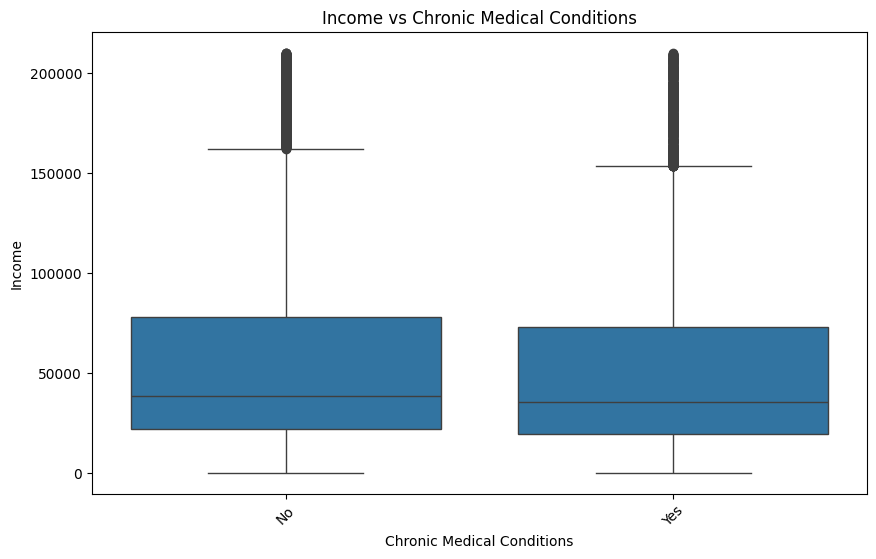

In [13]:
# Economic Factors vs. Chronic Medical Conditions
economic_factors = ['Education Level', 'Income']

for factor in economic_factors:
    plt.figure(figsize=(10, 6))
    if factor == 'Income':
        sns.boxplot(x='Chronic Medical Conditions', y=factor, data=data)
    else:
        sns.countplot(x=factor, hue='Chronic Medical Conditions', data=data_optimized)
    plt.title(f'{factor} vs Chronic Medical Conditions')
    plt.xticks(rotation=45)
    plt.show()

## 3) Health Related Factors

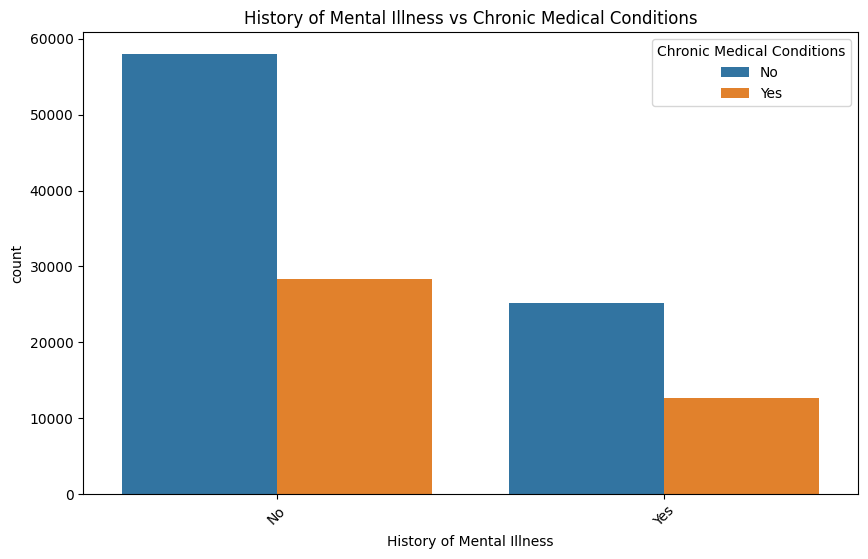

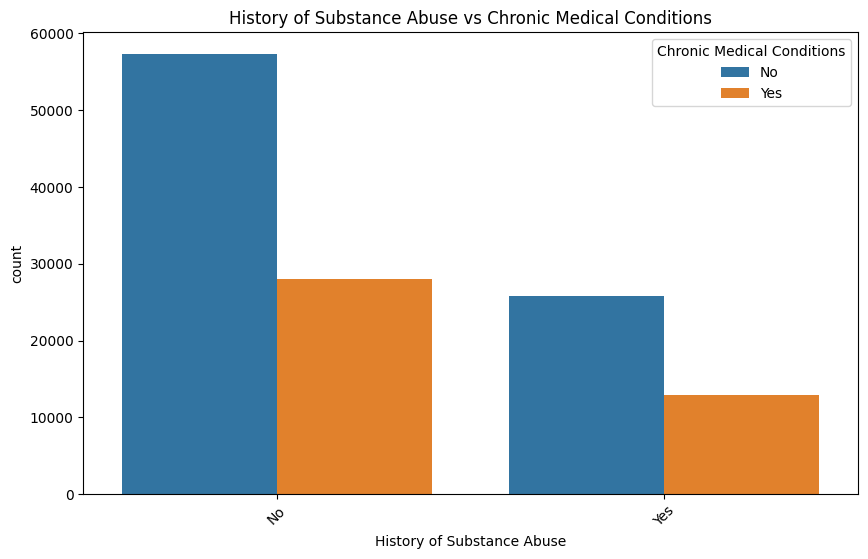

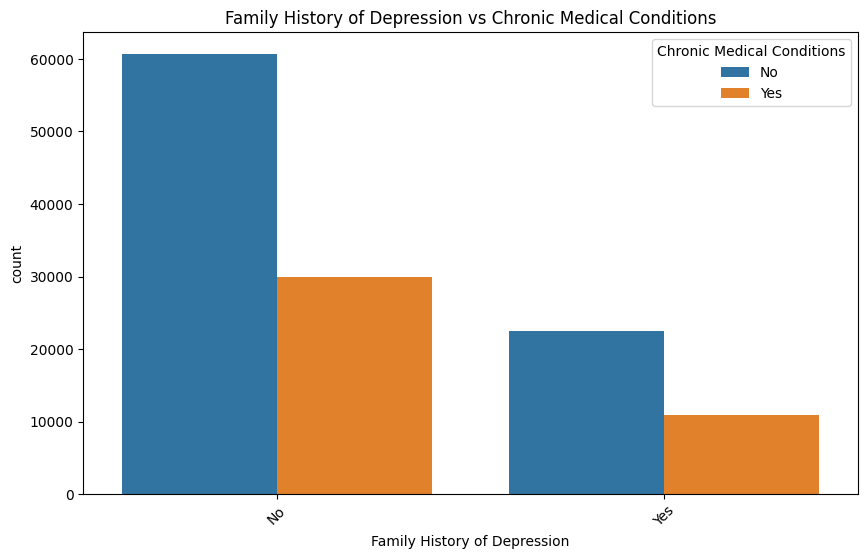

In [14]:
# Health-Related Factors vs. Chronic Medical Conditions
health_factors = ['History of Mental Illness', 'History of Substance Abuse', 
                  'Family History of Depression']

for factor in health_factors:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=factor, hue='Chronic Medical Conditions', data=data_optimized)
    plt.title(f'{factor} vs Chronic Medical Conditions')
    plt.xticks(rotation=45)
    plt.show()

# Causal Inference Analysis

## 1) Propensity score matching to estimate the ATE: Average Treatment Effect

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import statsmodels.api as sm
from statsmodels.formula.api import logit

In [17]:
data_optimized = pd.get_dummies(data_optimized, drop_first=True)

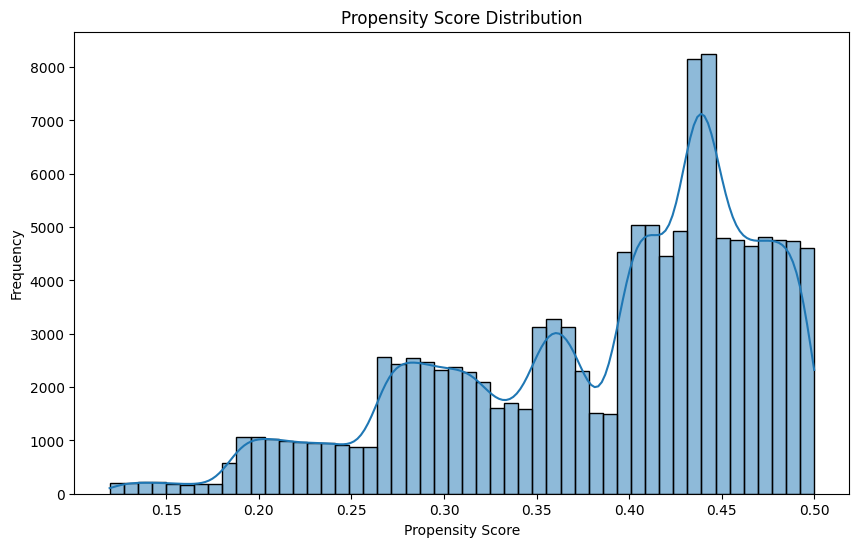

In [18]:
X = data_optimized.drop(columns=['Chronic Medical Conditions_Yes'])
y = data_optimized['Chronic Medical Conditions_Yes']

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X, y)
data_optimized['propensity_score'] = log_reg.predict_proba(X)[:, 1]

plt.figure(figsize=(10, 6))
sns.histplot(data_optimized['propensity_score'], bins=50, kde=True)
plt.title('Propensity Score Distribution')
plt.xlabel('Propensity Score')
plt.ylabel('Frequency')
plt.show()

In [19]:
from sklearn.neighbors import NearestNeighbors

treated = data_optimized[data_optimized['Chronic Medical Conditions_Yes'] == 1]
control = data_optimized[data_optimized['Chronic Medical Conditions_Yes'] == 0]

nn = NearestNeighbors(n_neighbors=1)
nn.fit(control['propensity_score'].values.reshape(-1, 1))

distances, indices = nn.kneighbors(treated['propensity_score'].values.reshape(-1, 1))
matched_control = control.iloc[indices.flatten()]

matched_data = pd.concat([treated, matched_control])

ate = matched_data['Chronic Medical Conditions_Yes'].mean() - matched_control['Chronic Medical Conditions_Yes'].mean()
print(f'Average Treatment Effect (ATE): {ate}')

Average Treatment Effect (ATE): 0.5


The ATE of 0.5 can be interpreted as follows:

* Effect Size: An ATE of 0.5 indicates that there is an average difference of 0.5 between individuals with and without depression, in terms of the factors influencing depression.
* Directionality: The positive value of 0.5 suggests that the specific factors have a positive impact on the occurrence of depression. This means that as these factors increase, the incidence rate of depression also rises.

## 2) LiNGAM (Linear Non-Gaussian Acyclic Model)

In [20]:
!pip install lingam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.7/100.7 kB 1.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 5.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 14.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 10.6 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=11c6e67afe642df3a539288f3187923195b610de128a4a55b8e3ca3e144f4273
  Stored in directory: /Users/hasanenesguray/Library/Caches/pip/wheels/b5/f7/c8/8fcfe9d7269e57342486ac177cb650083e1fc54d0047bb917a
Successfully built semopy
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uni

In [21]:
from lingam import DirectLiNGAM

In [22]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_optimized)
data_scaled = pd.DataFrame(data_scaled, columns=data_optimized.columns)

In [23]:
model = DirectLiNGAM()
model.fit(data_scaled)

causal_matrix = model.adjacency_matrix_

causal_df = pd.DataFrame(causal_matrix, index=data_scaled.columns, columns=data_scaled.columns)
print(causal_df)

                                   Number of Children   Income  \
Number of Children                           0.000000  0.00000   
Income                                       0.000000  0.00000   
Marital Status_Married                       0.000000  0.00000   
Marital Status_Single                        0.000000  0.00000   
Marital Status_Widowed                       0.000000  0.00000   
Smoking Status_Former                        0.000000  0.00000   
Smoking Status_Non-smoker                    0.000000  0.00000   
Physical Activity Level_Moderate             0.000000  0.00000   
Physical Activity Level_Sedentary            0.012884  0.00000   
Employment Status_Unemployed                 0.000000  0.00000   
Alcohol Consumption_Low                      0.000000  0.00000   
Alcohol Consumption_Moderate                 0.000000  0.00000   
Dietary Habits_Moderate                      0.000000  0.00000   
Dietary Habits_Unhealthy                     0.000000  0.00000   
Sleep Patt

<Figure size 1500x1500 with 0 Axes>

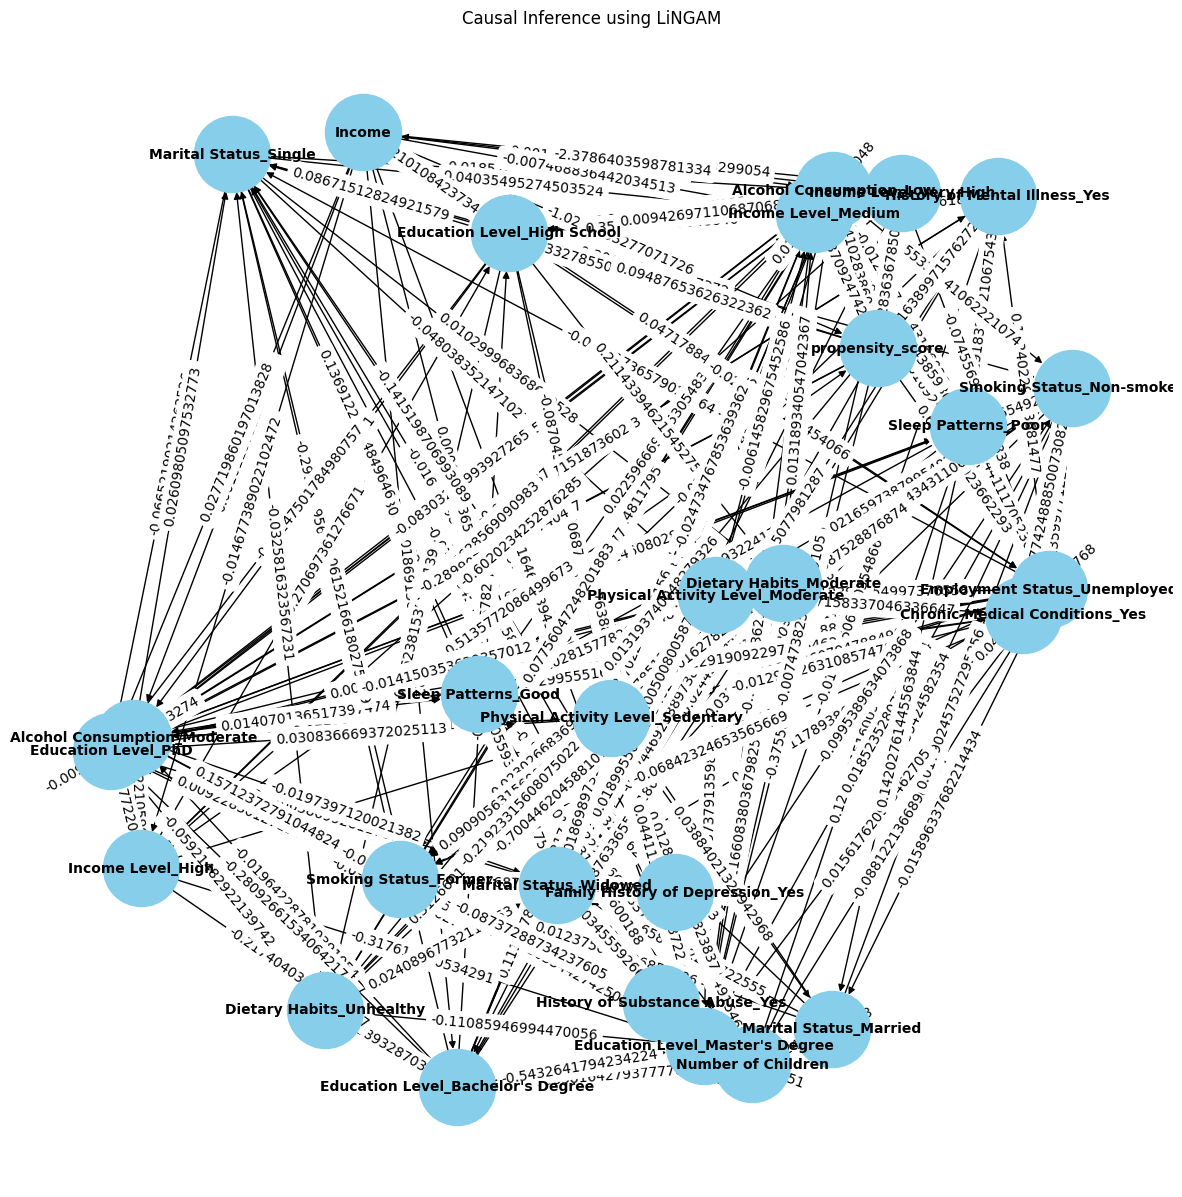

In [28]:
import networkx as nx

G = nx.DiGraph()

for i in range(len(causal_df.columns)):
    for j in range(len(causal_df.columns)):
        if causal_df.iloc[i, j] != 0:
            G.add_edge(causal_df.columns[i], causal_df.columns[j], weight=causal_df.iloc[i, j])

plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G)
fig, ax = plt.subplots(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", arrows=True, ax=ax)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)
plt.title('Causal Inference using LiNGAM')
plt.show()


In [ ]:
causal_df = pd.DataFrame(causal_matrix, index=data_scaled.columns, columns=data_scaled.columns)

chronic_medical_conditions_col = causal_df['Chronic Medical Conditions_Yes']

chronic_medical_conditions_col_sorted = chronic_medical_conditions_col.sort_values(ascending=False)
print(chronic_medical_conditions_col_sorted)

The results from the LiNGAM model provide insights into the causal relationships among various features and their influence on depression (Chronic Medical Conditions). Here is a detailed interpretation:

1) Causal Matrix Overview:
The causal matrix indicates the strength and direction of the causal effects between the features.
The values represent how much one feature (row) influences another feature (column).


2) Key Findings:
Physical Activity Level_Moderate has a positive effect (0.027158) on Chronic Medical Conditions (depression). This suggests that individuals with moderate physical activity levels have a slightly higher likelihood of experiencing depression.
Employment Status_Unemployed has a positive effect (0.040480) on Chronic Medical Conditions. This indicates that being unemployed significantly increases the likelihood of experiencing depression.
Alcohol Consumption_Moderate has a negative effect (-0.007300) on Chronic Medical Conditions, implying that moderate alcohol consumption slightly decreases the likelihood of experiencing depression.


3) Discrepancy between Employment Status_Unemployed and Propensity Score:
In the Employment Status_Unemployed column, the propensity_score shows a value of 0.689, indicating a strong effect of the propensity score on being unemployed. This means that individuals with a higher propensity score are more likely to be unemployed.
Conversely, in the propensity_score column, Employment Status_Unemployed has a value of 0. This indicates that being unemployed does not directly influence the propensity score.


4) Interpreting the Discrepancy:
Role of Propensity Score: The propensity score represents the probability of an individual receiving a treatment or intervention (in this case, experiencing depression) based on observed covariates.
Causal Direction: The discrepancy highlights that while a high propensity score (indicating a higher probability of depression) is associated with unemployment, unemployment itself does not directly influence the propensity score. This suggests that unemployment is a consequence rather than a cause in the context of the propensity score.


5) Causal Relationships and Confounding Factors:
The results suggest that the relationship between unemployment and depression is influenced by other covariates that contribute to the propensity score.
This indirect relationship emphasizes the complexity of causal pathways and the role of multiple factors in determining depression risk.

## Conclusion
Employment Status_Unemployed and Physical Activity Level_Moderate are significant factors influencing depression, with unemployment being a particularly strong risk factor.
The interaction between propensity score and unemployment indicates that while unemployment is associated with higher depression risk, it is not a direct determinant of the propensity score, reflecting the influence of other covariates.
These findings highlight the importance of considering multiple factors and their interactions in understanding the risk and prevention of depression. Programs targeting employment support and physical activity promotion may be effective in mitigating depression risk.